In [1]:
#points

In [2]:
from volumetricspy.stats import Dot,CloudPoints
from volumetricspy.utils import azimuth_matrix, angle_matrix
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d


In [3]:
p1 = Dot(x=10,y=20,z=1, fields={'phi':0.15})


In [4]:
p1.df()

,x,y,z,crs,phi,geometry
0,10.0,20.0,1.0,None,0.15,POINT (10.00000 20.00000)


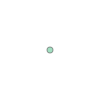

In [5]:
p1.to_shapely()

In [6]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df

,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
...,...,...,...,...,...
284,190,199,1,0.109411,3.247265
285,190,419,0,0.099541,1.528003
286,920,379,0,0.094099,2.514597
287,60,149,0,0.100167,3.636854


In [7]:
cp = CloudPoints().from_df(df, x='X',y='Y', fields=['Facies','Porosity','Perm'])
cp.df()

,x,y,z,crs,Facies,Porosity,Perm,geometry
0,100.0,900.0,None,None,1.0,0.115359,5.736104,POINT (100.000 900.000)
1,100.0,800.0,None,None,1.0,0.136425,17.211462,POINT (100.000 800.000)
2,100.0,600.0,None,None,1.0,0.135810,43.724752,POINT (100.000 600.000)
3,100.0,500.0,None,None,0.0,0.094414,1.609942,POINT (100.000 500.000)
4,100.0,100.0,None,None,0.0,0.113049,10.886001,POINT (100.000 100.000)
...,...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265,POINT (190.000 199.000)
285,190.0,419.0,None,None,0.0,0.099541,1.528003,POINT (190.000 419.000)
286,920.0,379.0,None,None,0.0,0.094099,2.514597,POINT (920.000 379.000)
287,60.0,149.0,None,None,0.0,0.100167,3.636854,POINT (60.000 149.000)


In [8]:
cp.distance_matrix().shape

(289, 289)

<AxesSubplot:xlabel='x', ylabel='y'>

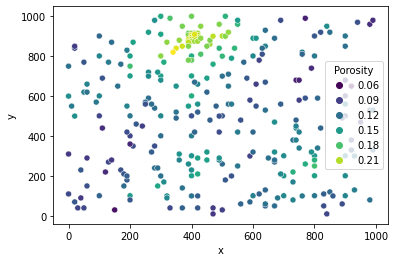

In [9]:
cp.plot(hue='Porosity',palette='viridis')

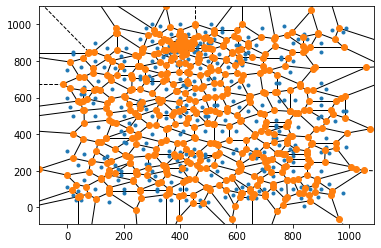

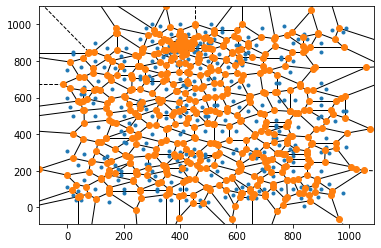

In [10]:
vr = Voronoi(df[['X','Y']].values)
voronoi_plot_2d(vr)

In [11]:
cp1 = cp.sample(10)
cp1.df()

,x,y,z,crs,Facies,Porosity,Perm,geometry
0,600.0,319.0,None,None,1.0,0.116017,9.836013,POINT (600.000 319.000)
1,430.0,889.0,None,None,1.0,0.200420,669.921340,POINT (430.000 889.000)
2,110.0,689.0,None,None,1.0,0.102856,4.723767,POINT (110.000 689.000)
3,990.0,529.0,None,None,1.0,0.118636,8.011768,POINT (990.000 529.000)
4,730.0,169.0,None,None,1.0,0.133724,7.350097,POINT (730.000 169.000)
5,550.0,959.0,None,None,1.0,0.170629,208.287507,POINT (550.000 959.000)
6,760.0,809.0,None,None,1.0,0.114570,1.858293,POINT (760.000 809.000)
7,680.0,89.0,None,None,1.0,0.127405,19.545407,POINT (680.000 89.000)
8,180.0,209.0,None,None,0.0,0.104042,2.912242,POINT (180.000 209.000)
9,400.0,229.0,None,None,1.0,0.142359,9.909687,POINT (400.000 229.000)


In [12]:
azi = 180
azi_tol =20
vr,sm=cp.variogram('Porosity',lag_dist=50, lag_tol=25,nlags=20)
vr

,i,j,distance,azimuth,x_i,y_i,z_i,crs_i,Facies_i,Porosity_i,...,x_j,y_j,z_j,crs_j,Facies_j,Porosity_j,Perm_j,geometry_j,lag,var
0,0,1,100.000000,180.000000,100.0,900.0,None,None,1.0,0.115359,...,100.0,800.0,None,None,1.0,0.136425,17.211462,POINT (100.000 800.000),75.0,0.000222
1,0,2,300.000000,180.000000,100.0,900.0,None,None,1.0,0.115359,...,100.0,600.0,None,None,1.0,0.135810,43.724752,POINT (100.000 600.000),275.0,0.000209
2,0,3,400.000000,180.000000,100.0,900.0,None,None,1.0,0.115359,...,100.0,500.0,None,None,0.0,0.094414,1.609942,POINT (100.000 500.000),375.0,0.000219
3,0,4,800.000000,180.000000,100.0,900.0,None,None,1.0,0.115359,...,100.0,100.0,None,None,0.0,0.113049,10.886001,POINT (100.000 100.000),775.0,0.000003
4,0,5,141.421356,135.000000,100.0,900.0,None,None,1.0,0.115359,...,200.0,800.0,None,None,1.0,0.154648,106.491795,POINT (200.000 800.000),125.0,0.000772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83227,288,283,300.665928,356.185925,390.0,549.0,None,None,1.0,0.153335,...,370.0,849.0,None,None,1.0,0.215776,2043.778350,POINT (370.000 849.000),275.0,0.001949
83228,288,284,403.112887,209.744881,390.0,549.0,None,None,1.0,0.153335,...,190.0,199.0,None,None,1.0,0.109411,3.247265,POINT (190.000 199.000),375.0,0.000965
83229,288,285,238.537209,236.976132,390.0,549.0,None,None,1.0,0.153335,...,190.0,419.0,None,None,0.0,0.099541,1.528003,POINT (190.000 419.000),225.0,0.001447
83230,288,286,556.596802,107.783888,390.0,549.0,None,None,1.0,0.153335,...,920.0,379.0,None,None,0.0,0.094099,2.514597,POINT (920.000 379.000),525.0,0.001754


<AxesSubplot:xlabel='lag', ylabel='var'>

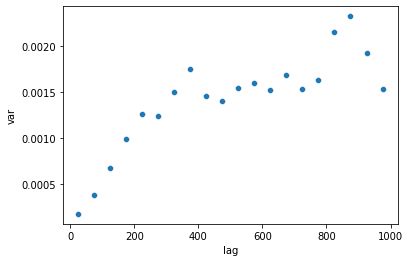

In [15]:
sns.scatterplot(data=sm, x='lag', y='var')

In [16]:
cp.df()['Porosity'].var()

0.0014246987124427552